Try to do monte carlo to test how spins will react if a neighboring spin has flipped. 
References: 
https://medium.com/@natsunoyuki/simulating-magnetism-with-python-a15f7c3042f1
https://youtu.be/yApmR-c_hKU?si=x4GEl3o5ExXhNk36
https://lampz.tugraz.at/~hadley/ss2/magnetism/mft.php
https://www1.spms.ntu.edu.sg/~ydchong/teaching/PH4505-12.htm#Basic_formulation
https://www1.spms.ntu.edu.sg/~ydchong/teaching/PH4505-11.htm
https://en.wikipedia.org/wiki/Wolff_algorithm
https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.62.361

[[0.99519525 0.93503083 0.5        0.06496917 0.00480475]
 [0.00480475 0.06496917 0.5        0.93503083 0.99519525]]
Total energy of the lattice: -24


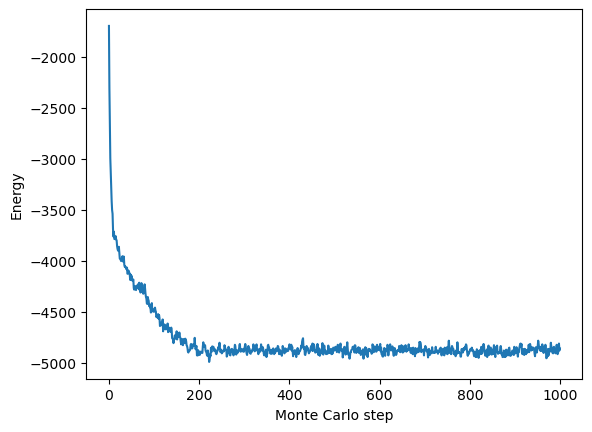

In [2]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def ising2D_step(Nx, Ny, spin, pflip):
    N = Nx * Ny

    # Randomly choose a spin
    r = np.random.randint(N)
    x = r % Nx
    y = r // Nx

    # Neighbor indices (with periodic boundary conditions)
    s0 = spin[r]
    s1 = spin[(x + 1) % Nx + y * Nx]
    s2 = spin[x + ((y + 1) % Ny) * Nx]
    s3 = spin[(x - 1 + Nx) % Nx + y * Nx]
    s4 = spin[x + ((y - 1 + Ny) % Ny) * Nx]

    neighbors = s1 + s2 + s3 + s4

    # Determine row (s0) and column (neighbours) for pflip lookup
    pfliprow = 0 if s0 == 1 else 1
    if neighbors == -4:
        pflipcol = 0
    elif neighbors == -2:
        pflipcol = 1
    elif neighbors == 0:
        pflipcol = 2
    elif neighbors == 2:
        pflipcol = 3
    elif neighbors == 4:
        pflipcol = 4

    # Flip the spin with probability from table
    if np.random.random() < pflip[pfliprow, pflipcol]:
        spin[r] = -spin[r]

    return spin

Nx, Ny = 50, 50
spin = np.random.choice([-1, 1], size=Nx*Ny)  # initialize once

T = 1.5

# possible neighbor sums
H_vals = [-4, -2, 0, 2, 4]

pflip = np.zeros((2,5))

for i, h in enumerate(H_vals):
    # probability that spin becomes +1
    p_up = 1 / (1 + np.exp(-2*h/T))
    
    # spin = +1: flip to -1
    pflip[0, i] = 1 - p_up
    
    # spin = -1: flip to +1
    pflip[1, i] = p_up

print(pflip)

spin = ising2D_step(Nx, Ny, spin, pflip)

def calculate_energy(spin, Nx, Ny, J=1):
    E = 0
    for y in range(Ny):
        for x in range(Nx):
            s = spin[x + y * Nx]
            # Sum over right and down neighbors only to avoid double-counting
            right = spin[(x + 1) % Nx + y * Nx]
            down  = spin[x + ((y + 1) % Ny) * Nx]
            E += -J * s * (right + down)
    return E

E = calculate_energy(spin, Nx, Ny)
print("Total energy of the lattice:", E)

energies = []
for step in range(1000):
    for _ in range(Nx * Ny):
        spin = ising2D_step(Nx, Ny, spin, pflip)
    energies.append(calculate_energy(spin, Nx, Ny))

# Plot energy vs steps
import matplotlib.pyplot as plt
plt.plot(energies)
plt.xlabel("Monte Carlo step")
plt.ylabel("Energy")
plt.show()

In [28]:
# The method using pflip didnt give me the energy plot i was looking for trying a different method 

In [1]:
import numpy as np

T = 1.5

# possible neighbor sums
H_vals = [-4, -2, 0, 2, 4]

pflip = np.zeros((2,5))

for i, h in enumerate(H_vals):
    # probability that spin becomes +1
    p_up = 1 / (1 + np.exp(-2*h/T))
    
    # spin = +1: flip to -1
    pflip[0, i] = 1 - p_up
    
    # spin = -1: flip to +1
    pflip[1, i] = p_up

print(pflip)


[[0.99519525 0.93503083 0.5        0.06496917 0.00480475]
 [0.00480475 0.06496917 0.5        0.93503083 0.99519525]]


In [3]:
for y in range(Ny):
    row = ""
    for x in range(Nx):
        row += "↑ " if spin[x + y*Nx] == 1 else "↓ "
    print(row)

↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↑ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ 
↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ 
↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ 
↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↑ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ 
↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ 
↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↑ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ 
↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ 
↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ 
↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ 
↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓

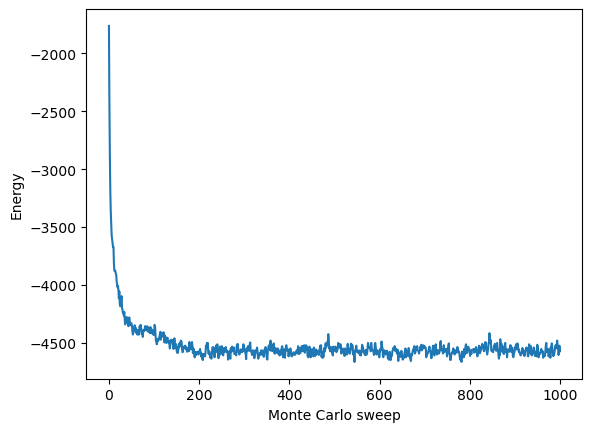

In [6]:
def metropolis_step(Nx, Ny, spin, T):
    N = Nx * Ny
    r = np.random.randint(N)
    x = r % Nx
    y = r // Nx

    s0 = spin[r]
    s1 = spin[(x + 1) % Nx + y * Nx]
    s2 = spin[x + ((y + 1) % Ny) * Nx]
    s3 = spin[(x - 1 + Nx) % Nx + y * Nx]
    s4 = spin[x + ((y - 1 + Ny) % Ny) * Nx]

    neighbors = s1 + s2 + s3 + s4
    deltaE = 2 * s0 * neighbors

    if deltaE <= 0 or np.random.random() < np.exp(-deltaE / T):
        spin[r] = -spin[r]

    return spin
Nx, Ny = 50, 50
spin = np.random.choice([-1, 1], size=Nx*Ny)
T = 1.5

energies_2 = []
for step in range(1000):
    for _ in range(Nx * Ny):
        spin = metropolis_step(Nx, Ny, spin, T)
    energies_2.append(calculate_energy(spin, Nx, Ny))

plt.plot(energies_2)
plt.xlabel("Monte Carlo sweep")
plt.ylabel("Energy")
plt.show()

In [30]:
# NOTE: This pflip table assigns fixed probabilities for spin flips based on the spin value and neighbor sum.
# Issues:
# 1. Probabilities are arbitrary and not physically derived.
# 2. Spins can flip even if energy increases, or fail to flip if energy decreases.
# 3. As a result, energy evolution is noisy and does not follow the true physics of the Ising model.